<a href="https://www.kaggle.com/code/eavprog/abscur-pairs-distr?scriptVersionId=243100891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Распределения для парных валютных курсов**

См. на сайте: [Гистограммы распределений валютных пар](https://www.abscur.ru/p/blog-page_71.html), [Рейтинг распределений валютных пар](https://www.abscur.ru/p/blog-page_51.html)


# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

days_ago_7 = today - pd.Timedelta(days=7)
month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
half_year_ago = today - pd.DateOffset(months=6)
year_ago = today - pd.DateOffset(years=1)
two_years_ago = today - pd.DateOffset(years=2)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [year_ago, today, "год","1y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Загрузка парных курсов

In [2]:
all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)
all_pairs

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-10,6.6838,98.986,6.4035,0.86205,100.928,6.5305,1.1975,8.0084,118.601,1.44105,...,45.8610,3.7520,7.42780,1.28975,32.780,2.25830,30.535,14.8040,21185.0,11.26180
2014-11-11,6.7387,100.658,6.4193,0.86902,102.124,6.5118,1.1920,8.0370,120.046,1.43499,...,46.3697,3.7520,7.38693,1.29220,32.840,2.25530,30.570,15.7710,21270.0,11.22300
2014-11-12,6.7527,100.673,6.4749,0.87092,102.078,6.5655,1.1862,8.0146,119.496,1.42672,...,45.5660,3.7517,7.43498,1.28940,32.820,2.25050,30.560,15.7495,21270.0,11.20350
2014-11-13,6.7530,100.809,6.4690,0.87090,101.769,6.5300,1.1907,8.0450,120.115,1.43225,...,46.7046,3.7520,7.43105,1.29162,32.770,2.24240,30.600,15.5550,21290.0,11.21670
2014-11-14,6.7796,101.680,6.4414,0.87445,102.948,6.5208,1.1914,8.0839,121.220,1.43151,...,47.2650,3.7520,7.38200,1.29625,32.870,2.24200,30.750,15.5100,21290.0,11.07250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,5.0812,92.599,6.1675,0.64864,103.899,6.9205,1.8777,9.5484,173.959,1.75376,...,79.6250,3.7506,9.50940,1.28384,32.580,38.96108,29.912,41.4999,25946.0,17.84460
2025-05-27,5.0502,92.946,6.1991,0.64435,104.445,6.9655,1.8754,9.4759,174.445,1.75789,...,80.1250,3.7508,9.61026,1.28840,32.744,39.03040,29.951,41.4999,25945.0,17.92714
2025-05-28,5.0313,92.965,6.1987,0.64220,104.638,6.9757,1.8824,9.4784,175.166,1.75751,...,79.7500,3.7508,9.64537,1.28931,32.680,39.06165,29.892,41.6758,25950.0,17.92720


# 2. Статистические распределения и статистические закономерности

## 2.1 - По собранному в разделе 1 статистическому массиву данных постройте дискретный вариационный ряд распределения. Изобразите полученный ряд распределения графически.

Анализ валютной пары: EURAUD
Период: с 2014-11-10 по 2025-05-30
Количество наблюдений: 2755
Диапазон значений: от 1.3689 до 1.8873

ДИСКРЕТНЫЙ ВАРИАЦИОННЫЙ РЯД РАСПРЕДЕЛЕНИЯ
    Значение курса (xi)  Частота (fi)  Относительная частота
0                  1.37             8               0.002904
1                  1.38            14               0.005082
2                  1.39            23               0.008348
3                  1.40            26               0.009437
4                  1.41            32               0.011615
5                  1.42            47               0.017060
6                  1.43            36               0.013067
7                  1.44            37               0.013430
8                  1.45            61               0.022142
9                  1.46            70               0.025408
10                 1.47            86               0.031216
11                 1.48           102               0.037024
12                 1.49          

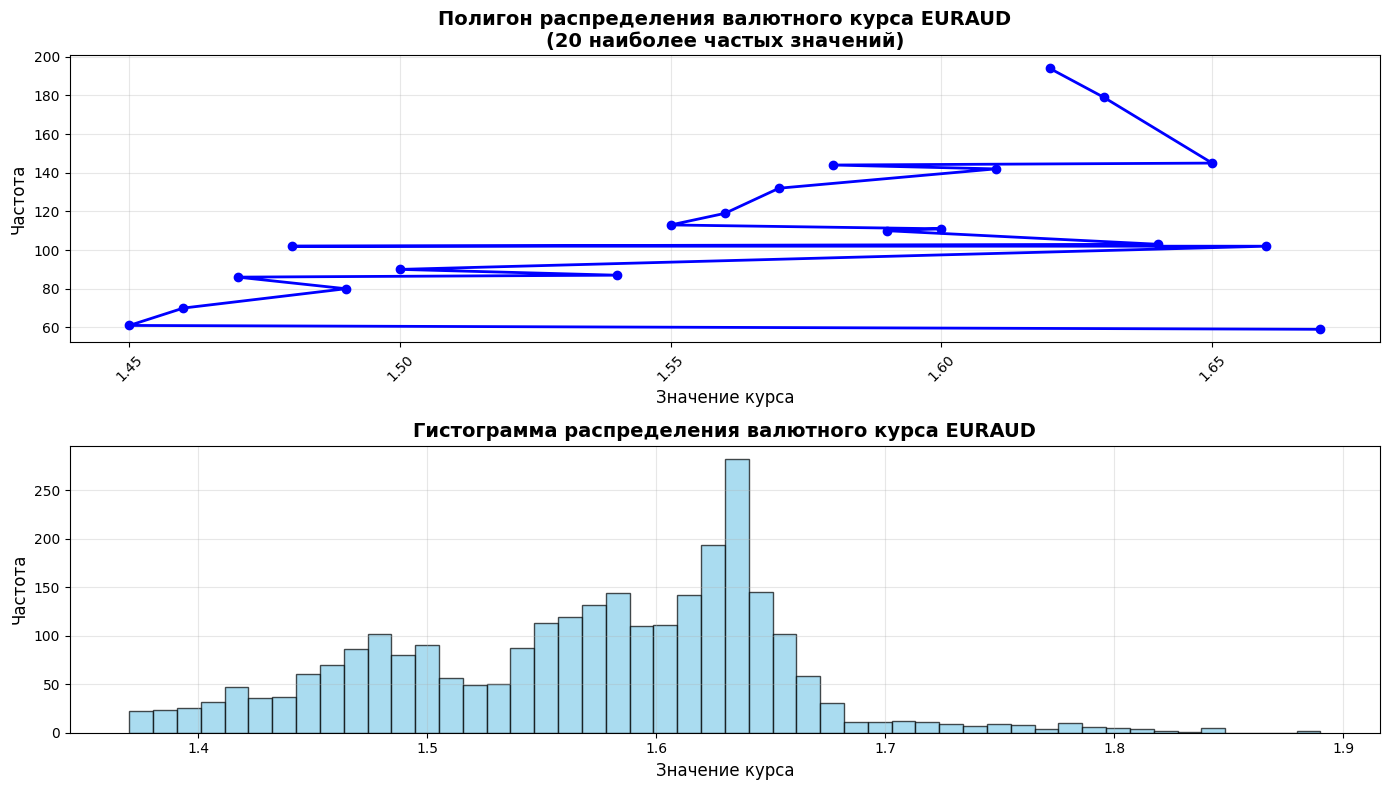


Дополнительная информация:
Среднее значение: 1.5689
Медиана: 1.5793
Стандартное отклонение: 0.0833

Распределение по частотам:
Частота 194: встречается у 1 значений
Частота 179: встречается у 1 значений
Частота 145: встречается у 1 значений
Частота 144: встречается у 1 значений
Частота 142: встречается у 1 значений
Частота 132: встречается у 1 значений
Частота 119: встречается у 1 значений
Частота 113: встречается у 1 значений
Частота 111: встречается у 1 значений
Частота 110: встречается у 1 значений


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Выберем одну валютную пару для анализа (например, EURAUD)
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print(f"Анализ валютной пары: {selected_pair}")
print(f"Период: с {data.index.min().strftime('%Y-%m-%d')} по {data.index.max().strftime('%Y-%m-%d')}")
print(f"Количество наблюдений: {len(data)}")
print(f"Диапазон значений: от {data.min():.4f} до {data.max():.4f}")

# Округлим значения до 2 знаков после запятой для создания дискретных значений
data_rounded = data.round(2)

# Построим дискретный вариационный ряд
value_counts = data_rounded.value_counts().sort_index()

# Создадим таблицу вариационного ряда
variation_series = pd.DataFrame({
    'Значение курса (xi)': value_counts.index,
    'Частота (fi)': value_counts.values,
    'Относительная частота': value_counts.values / len(data_rounded)
})

print("\n" + "="*60)
print("ДИСКРЕТНЫЙ ВАРИАЦИОННЫЙ РЯД РАСПРЕДЕЛЕНИЯ")
print("="*60)
print(variation_series.head(15))  # Выводим первые 15 строк
print("...")
print(f"Всего уникальных значений: {len(variation_series)}")
print(f"Сумма частот: {variation_series['Частота (fi)'].sum()}")

# Найдем основные характеристики
print(f"\nОсновные характеристики:")
print(f"Мода (наиболее частое значение): {variation_series.loc[variation_series['Частота (fi)'].idxmax(), 'Значение курса (xi)']} (частота: {variation_series['Частота (fi)'].max()})")

# Для графического изображения возьмем только наиболее частые значения
top_values = variation_series.nlargest(20, 'Частота (fi)')

# Построим полигон распределения
plt.figure(figsize=(14, 8))

# График 1: Полигон распределения (топ 20 значений)
plt.subplot(2, 1, 1)
plt.plot(top_values['Значение курса (xi)'], top_values['Частота (fi)'], 
         marker='o', linestyle='-', linewidth=2, markersize=6, color='blue')
plt.title(f'Полигон распределения валютного курса {selected_pair}\n(20 наиболее частых значений)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Значение курса', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# График 2: Гистограмма всех значений (сгруппированная)
plt.subplot(2, 1, 2)
plt.hist(data_rounded, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма распределения валютного курса {selected_pair}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Значение курса', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная статистика
print(f"\nДополнительная информация:")
print(f"Среднее значение: {data.mean():.4f}")
print(f"Медиана: {data.median():.4f}")
print(f"Стандартное отклонение: {data.std():.4f}")

# Покажем распределение частот
print(f"\nРаспределение по частотам:")
freq_distribution = Counter(variation_series['Частота (fi)'])
for freq, count in sorted(freq_distribution.items(), reverse=True)[:10]:
    print(f"Частота {freq}: встречается у {count} значений")


## 2.2 - По данным п. 2.1 постройте интервальный вариационный ряд распределения. Изобразите полученный ряд распределения графически.

Построение интервального вариационного ряда для EURAUD
Количество наблюдений: 2755
Количество интервалов по формуле Стерджесса: 12
Минимальное значение: 1.3689
Максимальное значение: 1.8873
Ширина интервала: 0.0432

ИНТЕРВАЛЬНЫЙ ВАРИАЦИОННЫЙ РЯД РАСПРЕДЕЛЕНИЯ
        Интервал  Середина интервала  Частота (fi)  Относительная частота  Накопленная частота  Накопленная относительная частота
[1.3689; 1.4121)              1.3905            93                 0.0338                   93                             0.0338
[1.4121; 1.4553)              1.4337           191                 0.0693                  284                             0.1031
[1.4553; 1.4985)              1.4769           371                 0.1347                  655                             0.2377
[1.4985; 1.5417)              1.5201           266                 0.0966                  921                             0.3343
[1.5417; 1.5849)              1.5633           541                 0.1964                 

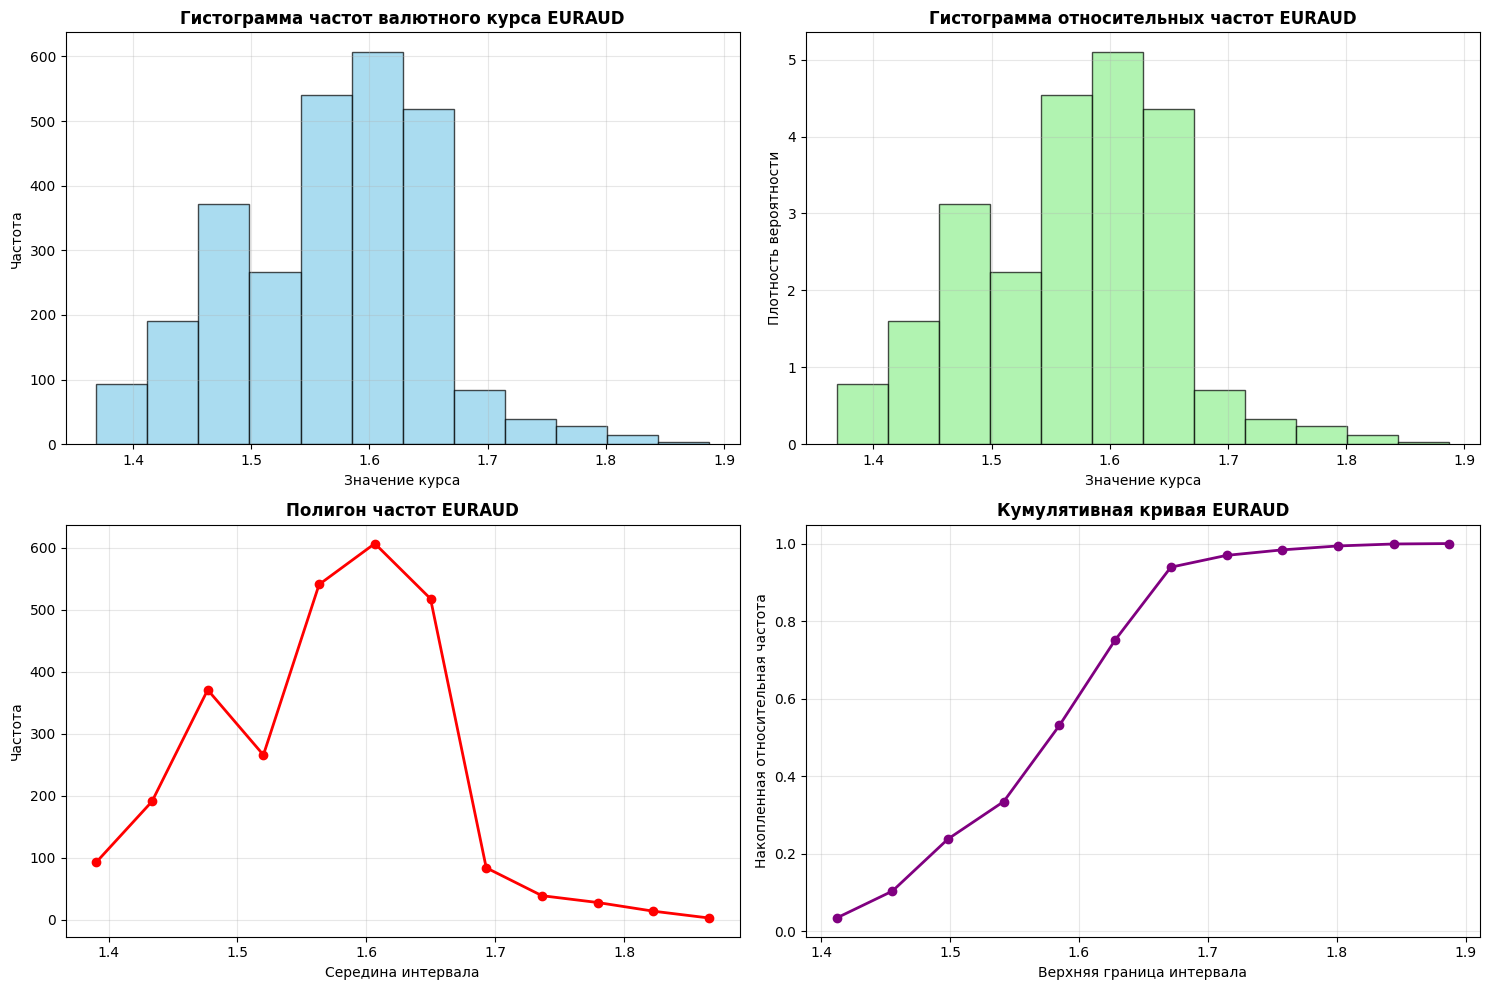


Дополнительный анализ:
Наиболее частый интервал: [1.5849; 1.6281)
Наименее частый интервал: [1.8441; 1.8873]
50% данных содержится в первых 5 интервалах
80% данных содержится в первых 7 интервалах


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, ceil

# Используем ту же валютную пару, что и в предыдущем задании
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print(f"Построение интервального вариационного ряда для {selected_pair}")
print(f"Количество наблюдений: {len(data)}")

# Определяем количество интервалов по формуле Стерджесса
n_intervals = int(1 + 3.322 * log10(len(data)))
print(f"Количество интервалов по формуле Стерджесса: {n_intervals}")

# Определяем границы данных
x_min = data.min()
x_max = data.max()
print(f"Минимальное значение: {x_min:.4f}")
print(f"Максимальное значение: {x_max:.4f}")

# Вычисляем ширину интервала
interval_width = (x_max - x_min) / n_intervals
print(f"Ширина интервала: {interval_width:.4f}")

# Создаем границы интервалов
interval_bounds = np.linspace(x_min, x_max, n_intervals + 1)

# Строим интервальный вариационный ряд
hist, bins = np.histogram(data, bins=interval_bounds)

# Создаем таблицу интервального вариационного ряда
interval_data = []
for i in range(len(hist)):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    frequency = hist[i]
    relative_frequency = frequency / len(data)
    cumulative_frequency = np.sum(hist[:i+1])
    cumulative_relative_frequency = cumulative_frequency / len(data)
    midpoint = (lower_bound + upper_bound) / 2
    
    interval_data.append({
        'Интервал': f"[{lower_bound:.4f}; {upper_bound:.4f})",
        'Середина интервала': round(midpoint, 4),
        'Частота (fi)': frequency,
        'Относительная частота': round(relative_frequency, 4),
        'Накопленная частота': cumulative_frequency,
        'Накопленная относительная частота': round(cumulative_relative_frequency, 4)
    })

# Корректируем последний интервал (делаем его закрытым)
if interval_data:
    last_interval = interval_data[-1]['Интервал']
    interval_data[-1]['Интервал'] = last_interval[:-1] + ']'

# Создаем DataFrame для удобного отображения
interval_df = pd.DataFrame(interval_data)

print("\n" + "="*80)
print("ИНТЕРВАЛЬНЫЙ ВАРИАЦИОННЫЙ РЯД РАСПРЕДЕЛЕНИЯ")
print("="*80)
print(interval_df.to_string(index=False))

# Выводим основные характеристики
print(f"\nОсновные характеристики интервального ряда:")
print(f"Общее количество наблюдений: {len(data)}")
print(f"Сумма частот: {np.sum(hist)}")
print(f"Размах вариации: {x_max - x_min:.4f}")
print(f"Модальный интервал: {interval_data[np.argmax(hist)]['Интервал']} (частота: {np.max(hist)})")

# Графическое изображение
plt.figure(figsize=(15, 10))

# График 1: Гистограмма частот
plt.subplot(2, 2, 1)
plt.hist(data, bins=interval_bounds, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма частот валютного курса {selected_pair}', fontsize=12, fontweight='bold')
plt.xlabel('Значение курса', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.grid(True, alpha=0.3)

# График 2: Гистограмма относительных частот
plt.subplot(2, 2, 2)
plt.hist(data, bins=interval_bounds, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Гистограмма относительных частот {selected_pair}', fontsize=12, fontweight='bold')
plt.xlabel('Значение курса', fontsize=10)
plt.ylabel('Плотность вероятности', fontsize=10)
plt.grid(True, alpha=0.3)

# График 3: Полигон частот (по серединам интервалов)
plt.subplot(2, 2, 3)
midpoints = [item['Середина интервала'] for item in interval_data]
frequencies = [item['Частота (fi)'] for item in interval_data]
plt.plot(midpoints, frequencies, marker='o', linestyle='-', linewidth=2, markersize=6, color='red')
plt.title(f'Полигон частот {selected_pair}', fontsize=12, fontweight='bold')
plt.xlabel('Середина интервала', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.grid(True, alpha=0.3)

# График 4: Кумулятивная кривая (кумулята)
plt.subplot(2, 2, 4)
upper_bounds = [bins[i+1] for i in range(len(hist))]
cumulative_freq = [item['Накопленная относительная частота'] for item in interval_data]
plt.plot(upper_bounds, cumulative_freq, marker='o', linestyle='-', linewidth=2, markersize=6, color='purple')
plt.title(f'Кумулятивная кривая {selected_pair}', fontsize=12, fontweight='bold')
plt.xlabel('Верхняя граница интервала', fontsize=10)
plt.ylabel('Накопленная относительная частота', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная информация для анализа
print(f"\nДополнительный анализ:")
print(f"Наиболее частый интервал: {interval_data[np.argmax(hist)]['Интервал']}")
print(f"Наименее частый интервал: {interval_data[np.argmin(hist)]['Интервал']}")

# Анализ концентрации данных
total_freq = len(data)
cumulative_50 = total_freq * 0.5
cumulative_80 = total_freq * 0.8

# Находим интервалы, содержащие 50% и 80% данных
for i, item in enumerate(interval_data):
    if item['Накопленная частота'] >= cumulative_50:
        print(f"50% данных содержится в первых {i+1} интервалах")
        break

for i, item in enumerate(interval_data):
    if item['Накопленная частота'] >= cumulative_80:
        print(f"80% данных содержится в первых {i+1} интервалах")
        break


## 2.3 Вычислите основные характеристики вариационного ряда распределения.

ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ВАРИАЦИОННОГО РЯДА РАСПРЕДЕЛЕНИЯ
Валютная пара: EURAUD

1. ОБЩАЯ ИНФОРМАЦИЯ:
Объем совокупности (n): 2755
Период наблюдения: с 2014-11-10 по 2025-05-30

2. ПОКАЗАТЕЛИ ЦЕНТРАЛЬНОЙ ТЕНДЕНЦИИ:
Средняя арифметическая (x̄): 1.568916
Медиана (Me): 1.579290
Мода (Mo): 1.556100 (частота: 6)

3. ПОКАЗАТЕЛИ ВАРИАЦИИ:
Минимальное значение (x_min): 1.368900
Максимальное значение (x_max): 1.887290
Размах вариации (R): 0.518390
Среднее линейное отклонение (d̄): 0.067509
Выборочная дисперсия (σ²): 0.00693962
Исправленная выборочная дисперсия (s²): 0.00694214
Выборочное среднее квадратическое отклонение (σ): 0.083304
Исправленное среднее квадратическое отклонение (s): 0.083319
Коэффициент вариации (V): 5.31%
Совокупность является: однородная

4. ПОКАЗАТЕЛИ ФОРМЫ РАСПРЕДЕЛЕНИЯ:
Центральный момент 1-го порядка (μ₁): -0.00000000
Центральный момент 2-го порядка (μ₂): 0.00693962
Центральный момент 3-го порядка (μ₃): -0.00004364
Центральный момент 4-го порядка (μ₄): 0.00014203
Коэффи

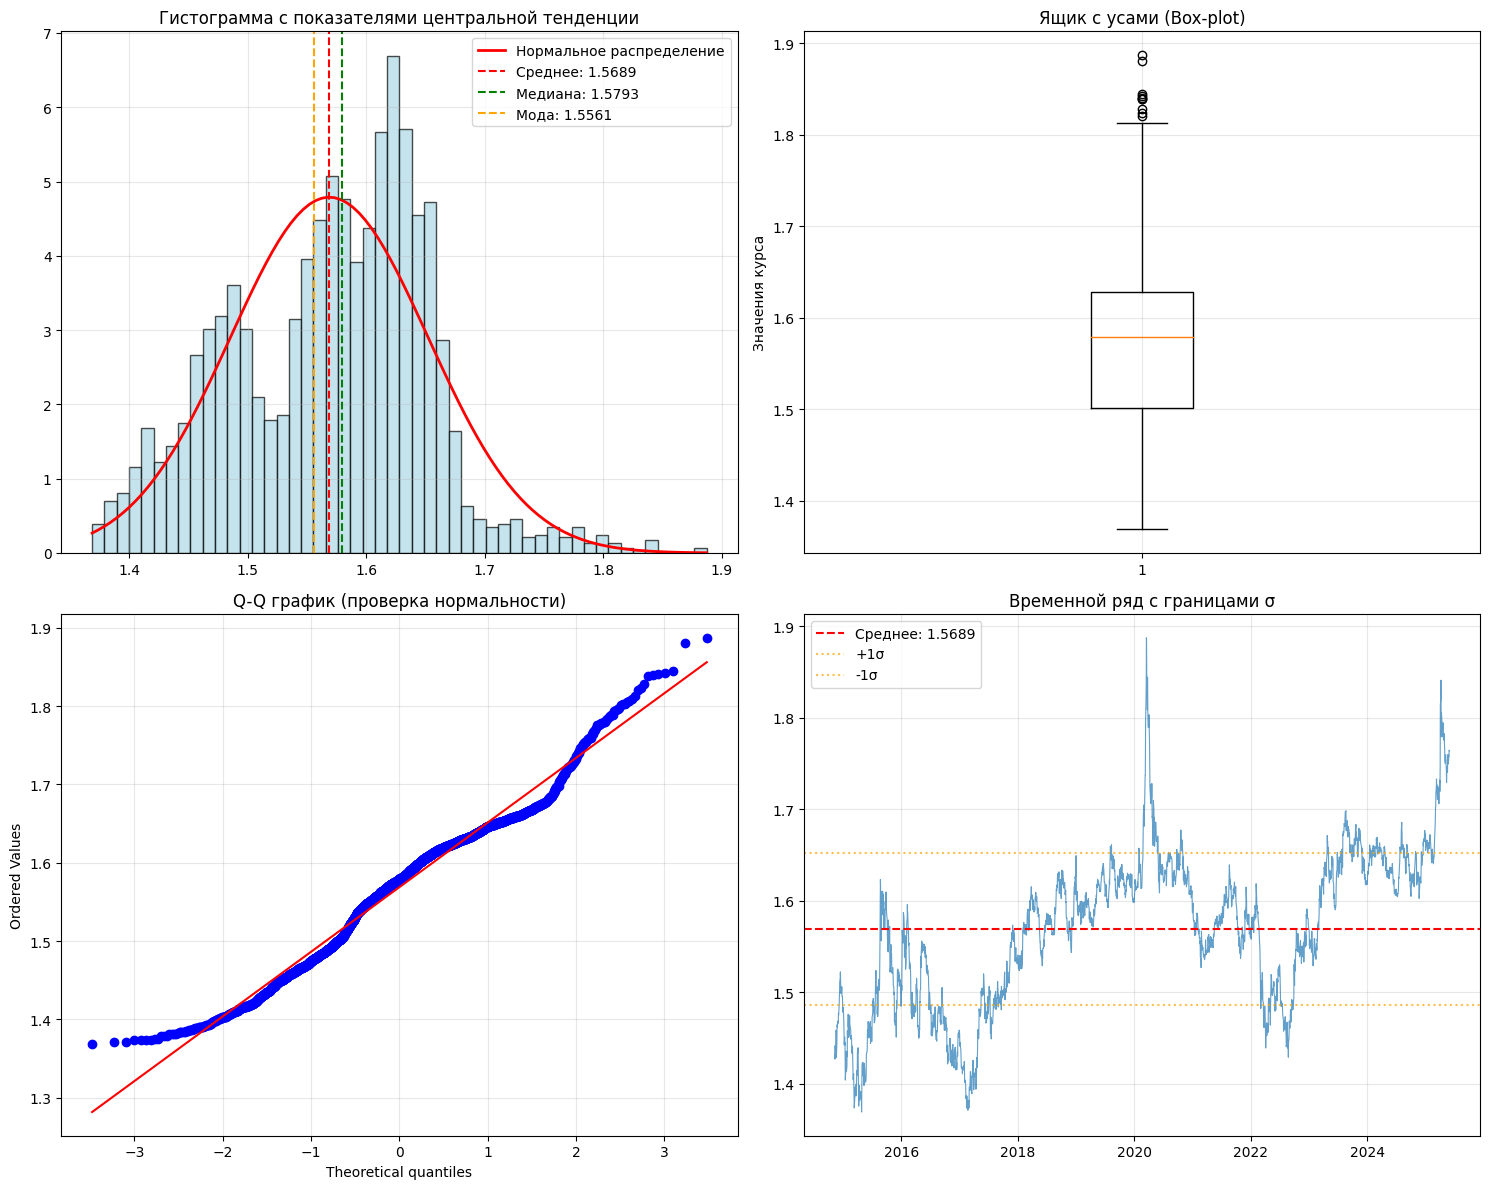


9. ЗАКЛЮЧЕНИЕ:
Анализ основных характеристик вариационного ряда для валютной пары EURAUD показал:
- Среднее значение курса: 1.5689
- Вариабельность: 5.3% (умеренная)
- Совокупность однородна
- Форма распределения: симметричное, нормальная островершинность
- распределение близко к нормальному


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Используем ту же валютную пару, что и в предыдущих заданиях
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print("="*80)
print(f"ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ВАРИАЦИОННОГО РЯДА РАСПРЕДЕЛЕНИЯ")
print(f"Валютная пара: {selected_pair}")
print("="*80)

# Основная информация о данных
print(f"\n1. ОБЩАЯ ИНФОРМАЦИЯ:")
print(f"Объем совокупности (n): {len(data)}")
print(f"Период наблюдения: с {data.index.min().strftime('%Y-%m-%d')} по {data.index.max().strftime('%Y-%m-%d')}")

# 1. ПОКАЗАТЕЛИ ЦЕНТРАЛЬНОЙ ТЕНДЕНЦИИ (СРЕДНЕГО УРОВНЯ)
print(f"\n2. ПОКАЗАТЕЛИ ЦЕНТРАЛЬНОЙ ТЕНДЕНЦИИ:")

# Средняя арифметическая
mean_value = data.mean()
print(f"Средняя арифметическая (x̄): {mean_value:.6f}")

# Медиана
median_value = data.median()
print(f"Медиана (Me): {median_value:.6f}")

# Мода (для дискретизированных данных)
data_rounded = data.round(4)
mode_series = data_rounded.value_counts()
mode_value = mode_series.index[0]
mode_frequency = mode_series.iloc[0]
print(f"Мода (Mo): {mode_value:.6f} (частота: {mode_frequency})")

# 2. ПОКАЗАТЕЛИ ВАРИАЦИИ
print(f"\n3. ПОКАЗАТЕЛИ ВАРИАЦИИ:")

# Минимум и максимум
min_value = data.min()
max_value = data.max()
print(f"Минимальное значение (x_min): {min_value:.6f}")
print(f"Максимальное значение (x_max): {max_value:.6f}")

# Размах вариации
range_value = max_value - min_value
print(f"Размах вариации (R): {range_value:.6f}")

# Среднее линейное отклонение
mean_deviation = np.mean(np.abs(data - mean_value))
print(f"Среднее линейное отклонение (d̄): {mean_deviation:.6f}")

# Дисперсия (выборочная и исправленная)
variance_sample = data.var(ddof=0)  # выборочная дисперсия
variance_corrected = data.var(ddof=1)  # исправленная выборочная дисперсия
print(f"Выборочная дисперсия (σ²): {variance_sample:.8f}")
print(f"Исправленная выборочная дисперсия (s²): {variance_corrected:.8f}")

# Среднее квадратическое отклонение
std_sample = data.std(ddof=0)  # выборочное СКО
std_corrected = data.std(ddof=1)  # исправленное выборочное СКО
print(f"Выборочное среднее квадратическое отклонение (σ): {std_sample:.6f}")
print(f"Исправленное среднее квадратическое отклонение (s): {std_corrected:.6f}")

# Коэффициент вариации
coef_variation = (std_corrected / mean_value) * 100
print(f"Коэффициент вариации (V): {coef_variation:.2f}%")

# Оценка однородности совокупности
if coef_variation <= 33:
    homogeneity = "однородная"
else:
    homogeneity = "неоднородная"
print(f"Совокупность является: {homogeneity}")

# 3. ПОКАЗАТЕЛИ ФОРМЫ РАСПРЕДЕЛЕНИЯ
print(f"\n4. ПОКАЗАТЕЛИ ФОРМЫ РАСПРЕДЕЛЕНИЯ:")

# Центральные моменты
def central_moment(data, order):
    """Вычисление центрального момента k-го порядка"""
    return np.mean((data - data.mean()) ** order)

# Центральные моменты 1-4 порядков
mu1 = central_moment(data, 1)
mu2 = central_moment(data, 2)
mu3 = central_moment(data, 3)
mu4 = central_moment(data, 4)

print(f"Центральный момент 1-го порядка (μ₁): {mu1:.8f}")
print(f"Центральный момент 2-го порядка (μ₂): {mu2:.8f}")
print(f"Центральный момент 3-го порядка (μ₃): {mu3:.8f}")
print(f"Центральный момент 4-го порядка (μ₄): {mu4:.8f}")

# Коэффициент асимметрии
skewness = stats.skew(data)
skewness_manual = mu3 / (std_sample ** 3)
print(f"Коэффициент асимметрии (As): {skewness:.6f}")
print(f"Коэффициент асимметрии (расчет через моменты): {skewness_manual:.6f}")

# Интерпретация асимметрии
if abs(skewness) < 0.25:
    skew_interpretation = "симметричное"
elif skewness > 0:
    skew_interpretation = "правосторонняя скошенность"
else:
    skew_interpretation = "левосторонняя скошенность"
print(f"Интерпретация асимметрии: {skew_interpretation}")

# Коэффициент эксцесса
kurtosis = stats.kurtosis(data)
kurtosis_manual = (mu4 / (std_sample ** 4)) - 3
print(f"Коэффициент эксцесса (Ex): {kurtosis:.6f}")
print(f"Коэффициент эксцесса (расчет через моменты): {kurtosis_manual:.6f}")

# Интерпретация эксцесса
if abs(kurtosis) < 0.25:
    kurt_interpretation = "нормальная островершинность"
elif kurtosis > 0:
    kurt_interpretation = "островершинное распределение"
else:
    kurt_interpretation = "плосковершинное распределение"
print(f"Интерпретация эксцесса: {kurt_interpretation}")

# 4. КВАНТИЛИ И ПРОЦЕНТИЛИ
print(f"\n5. КВАНТИЛИ И ПРОЦЕНТИЛИ:")
percentiles = [5, 10, 25, 50, 75, 90, 95]
for p in percentiles:
    value = np.percentile(data, p)
    print(f"{p}-й процентиль: {value:.6f}")

# Квартили
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print(f"Первый квартиль (Q₁): {Q1:.6f}")
print(f"Третий квартиль (Q₃): {Q3:.6f}")
print(f"Интерквартильный размах (IQR): {IQR:.6f}")

# 5. ДОПОЛНИТЕЛЬНЫЕ ХАРАКТЕРИСТИКИ
print(f"\n6. ДОПОЛНИТЕЛЬНЫЕ ХАРАКТЕРИСТИКИ:")

# Стандартная ошибка среднего
std_error = std_corrected / np.sqrt(len(data))
print(f"Стандартная ошибка среднего: {std_error:.6f}")

# Доверительный интервал для среднего (95%)
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, len(data) - 1)
margin_error = t_critical * std_error
ci_lower = mean_value - margin_error
ci_upper = mean_value + margin_error
print(f"95% доверительный интервал для среднего: [{ci_lower:.6f}; {ci_upper:.6f}]")

# 6. СВОДНАЯ ТАБЛИЦА ХАРАКТЕРИСТИК
print(f"\n7. СВОДНАЯ ТАБЛИЦА ОСНОВНЫХ ХАРАКТЕРИСТИК:")
characteristics_table = pd.DataFrame({
    'Характеристика': [
        'Среднее арифметическое', 'Медиана', 'Мода',
        'Минимум', 'Максимум', 'Размах',
        'Выборочная дисперсия', 'Исправленная дисперсия',
        'Выборочное СКО', 'Исправленное СКО',
        'Коэффициент вариации (%)', 'Коэффициент асимметрии',
        'Коэффициент эксцесса', 'Стандартная ошибка среднего'
    ],
    'Значение': [
        f"{mean_value:.6f}", f"{median_value:.6f}", f"{mode_value:.6f}",
        f"{min_value:.6f}", f"{max_value:.6f}", f"{range_value:.6f}",
        f"{variance_sample:.8f}", f"{variance_corrected:.8f}",
        f"{std_sample:.6f}", f"{std_corrected:.6f}",
        f"{coef_variation:.2f}", f"{skewness:.6f}",
        f"{kurtosis:.6f}", f"{std_error:.6f}"
    ]
})

print(characteristics_table.to_string(index=False))

# 7. ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ
print(f"\n8. ПРЕДВАРИТЕЛЬНАЯ ОЦЕНКА НОРМАЛЬНОСТИ:")

# Критерий асимметрии и эксцесса для нормальности
skew_normal = abs(skewness) < 0.5
kurt_normal = abs(kurtosis) < 0.5

print(f"Асимметрия близка к нормальной: {'Да' if skew_normal else 'Нет'}")
print(f"Эксцесс близок к нормальному: {'Да' if kurt_normal else 'Нет'}")

if skew_normal and kurt_normal:
    normality_conclusion = "Распределение близко к нормальному"
else:
    normality_conclusion = "Распределение отличается от нормального"
    
print(f"Предварительный вывод: {normality_conclusion}")

# 8. ПОСТРОЕНИЕ ГРАФИКОВ ДЛЯ ВИЗУАЛИЗАЦИИ
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Гистограмма с кривой нормального распределения
ax1.hist(data, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x_norm = np.linspace(data.min(), data.max(), 100)
y_norm = stats.norm.pdf(x_norm, mean_value, std_sample)
ax1.plot(x_norm, y_norm, 'r-', linewidth=2, label='Нормальное распределение')
ax1.axvline(mean_value, color='red', linestyle='--', label=f'Среднее: {mean_value:.4f}')
ax1.axvline(median_value, color='green', linestyle='--', label=f'Медиана: {median_value:.4f}')
ax1.axvline(mode_value, color='orange', linestyle='--', label=f'Мода: {mode_value:.4f}')
ax1.set_title('Гистограмма с показателями центральной тенденции')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Box-plot
ax2.boxplot(data, vert=True)
ax2.set_title('Ящик с усами (Box-plot)')
ax2.set_ylabel('Значения курса')
ax2.grid(True, alpha=0.3)

# График 3: Q-Q plot для проверки нормальности
stats.probplot(data, dist="norm", plot=ax3)
ax3.set_title('Q-Q график (проверка нормальности)')
ax3.grid(True, alpha=0.3)

# График 4: Временной ряд
ax4.plot(data.index, data.values, alpha=0.7, linewidth=0.8)
ax4.axhline(mean_value, color='red', linestyle='--', label=f'Среднее: {mean_value:.4f}')
ax4.axhline(mean_value + std_sample, color='orange', linestyle=':', alpha=0.7, label=f'+1σ')
ax4.axhline(mean_value - std_sample, color='orange', linestyle=':', alpha=0.7, label=f'-1σ')
ax4.set_title('Временной ряд с границами σ')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n9. ЗАКЛЮЧЕНИЕ:")
print(f"Анализ основных характеристик вариационного ряда для валютной пары {selected_pair} показал:")
print(f"- Среднее значение курса: {mean_value:.4f}")
print(f"- Вариабельность: {coef_variation:.1f}% ({'умеренная' if coef_variation < 25 else 'высокая' if coef_variation < 50 else 'очень высокая'})")
print(f"- Совокупность {'однородна' if coef_variation <= 33 else 'неоднородна'}")
print(f"- Форма распределения: {skew_interpretation.lower()}, {kurt_interpretation.lower()}")
print(f"- {normality_conclusion.lower()}")


## 2.4 - Используя результаты п. 2.2, постройте структурную и аналитическую группировки. Результаты представьте в табличной форме. Сформулируйте выводы.

СТРУКТУРНАЯ И АНАЛИТИЧЕСКАЯ ГРУППИРОВКИ
Валютная пара: EURAUD

Параметры группировки:
Количество групп: 8
Ширина интервала: 0.064799

1. СТРУКТУРНАЯ ГРУППИРОВКА
  Интервал курса  Частота (fi)  Относительная частота (wi)  Процентная доля (%)  Накопленная частота  Накопленная доля (%)
[1.3689; 1.4337)           179                      0.0650               6.4973                  179                6.4973
[1.4337; 1.4985)           476                      0.1728              17.2777                  655               23.7750
[1.4985; 1.5633)           503                      0.1826              18.2577                 1158               42.0327
[1.5633; 1.6281)           911                      0.3307              33.0672                 2069               75.0998
[1.6281; 1.6929)           578                      0.2098              20.9800                 2647               96.0799
[1.6929; 1.7577)            63                      0.0229               2.2868                 2710 

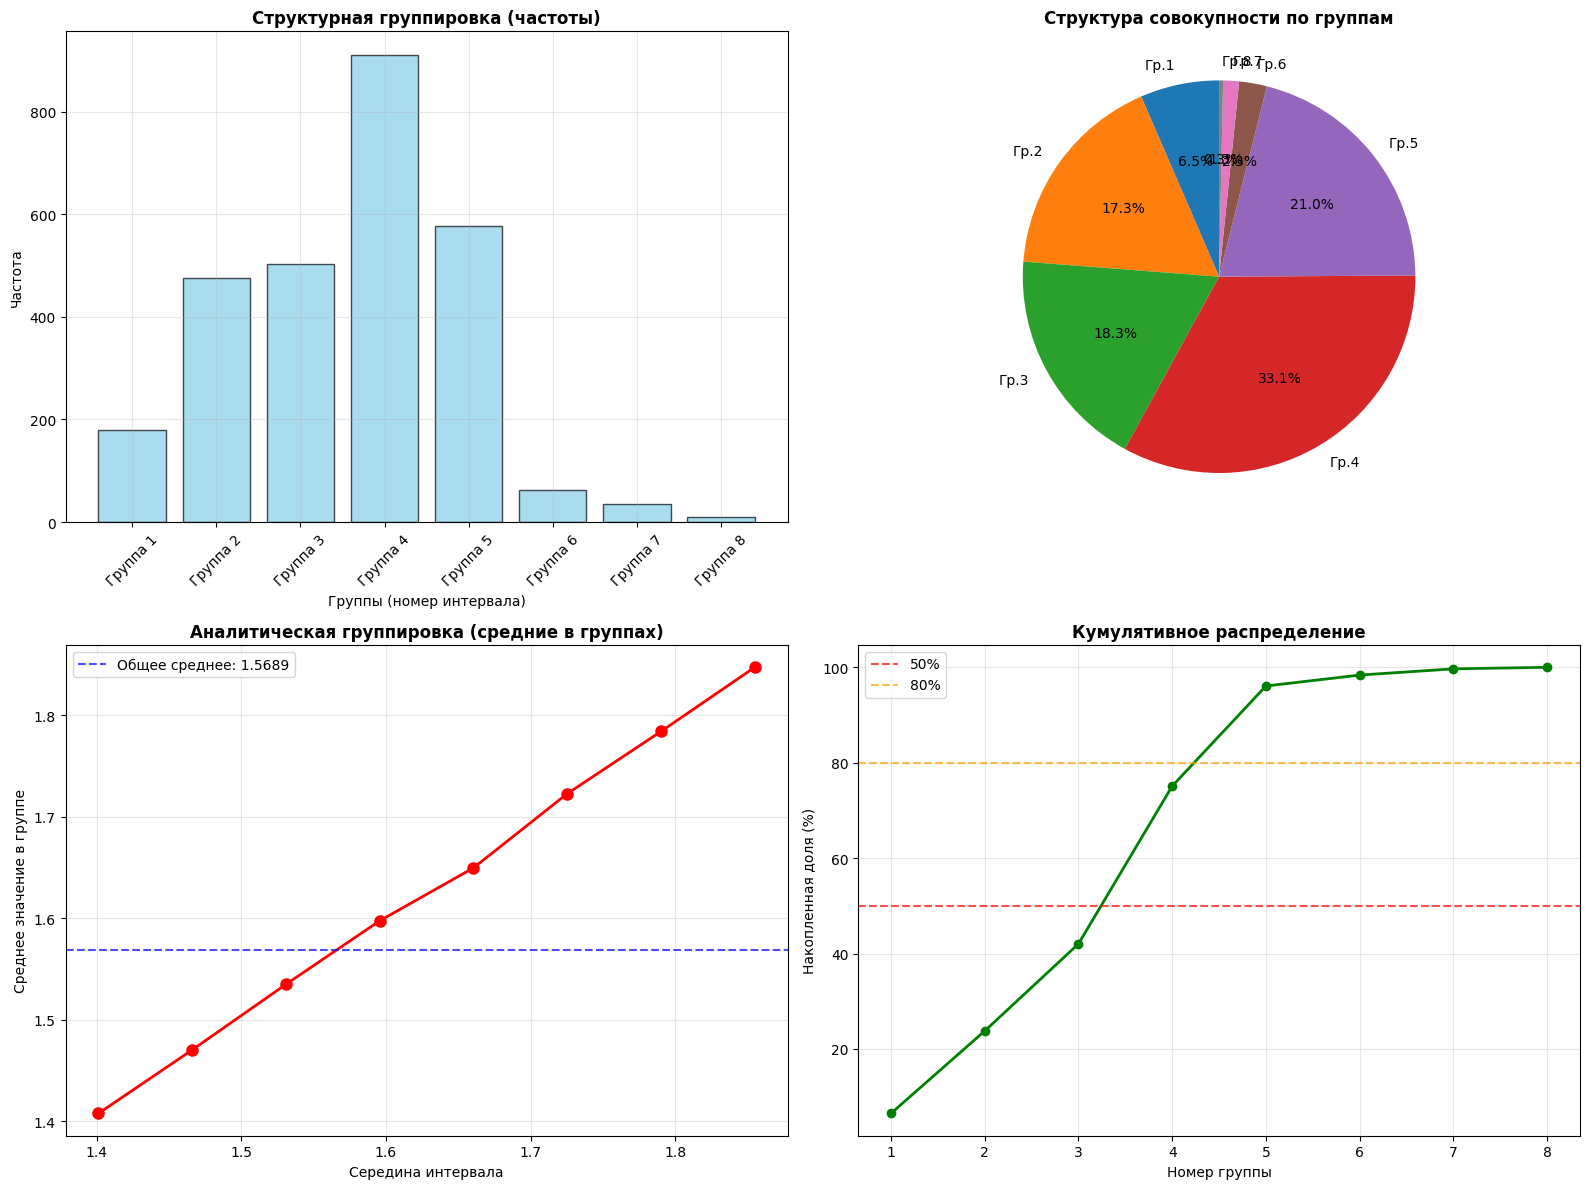



5. ВЫВОДЫ

По результатам структурной группировки:
• Распределение валютного курса EURAUD характеризуется умеренной концентрацией
• Наибольшая доля наблюдений (33.1%) приходится на интервал [1.5633; 1.6281)
• Данные распределены относительно равномерно (индекс концентрации: 39.6%)

По результатам аналитической группировки:
• Средние значения курса в группах варьируют от 1.4078 до 1.8473
• Наибольшая изменчивость наблюдается в группе [1.5633; 1.6281)
• Коэффициенты вариации внутри групп составляют от 0.91% до 1.28%

Общее заключение:
• Совокупность характеризуется нормальным распределением с умеренной вариацией
• Группировка подтверждает однородность данных (коэффициент вариации 5.31%)
• Структурная группировка показывает отсутствие резких выбросов и концентраций
• Аналитическая группировка демонстрирует плавное изменение характеристик между группами


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Используем данные валютной пары EURAUD
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print("="*80)
print("СТРУКТУРНАЯ И АНАЛИТИЧЕСКАЯ ГРУППИРОВКИ")
print(f"Валютная пара: {selected_pair}")
print("="*80)

# Определяем количество групп (используем формулу Стерджесса или берем оптимальное число)
n_groups = 8  # Оптимальное количество для анализа
min_val = data.min()
max_val = data.max()
interval_width = (max_val - min_val) / n_groups

print(f"\nПараметры группировки:")
print(f"Количество групп: {n_groups}")
print(f"Ширина интервала: {interval_width:.6f}")

# Создаем границы интервалов
bins = np.linspace(min_val, max_val, n_groups + 1)
bin_labels = []
for i in range(len(bins)-1):
    if i == len(bins)-2:  # Последний интервал закрытый справа
        bin_labels.append(f"[{bins[i]:.4f}; {bins[i+1]:.4f}]")
    else:
        bin_labels.append(f"[{bins[i]:.4f}; {bins[i+1]:.4f})")

# Группируем данные
data_grouped = pd.cut(data, bins=bins, labels=bin_labels, include_lowest=True)
freq_table = data_grouped.value_counts().sort_index()

# 1. СТРУКТУРНАЯ ГРУППИРОВКА
print(f"\n1. СТРУКТУРНАЯ ГРУППИРОВКА")
print("="*60)

structural_df = pd.DataFrame({
    'Интервал курса': freq_table.index,
    'Частота (fi)': freq_table.values,
    'Относительная частота (wi)': freq_table.values / len(data),
    'Процентная доля (%)': (freq_table.values / len(data)) * 100,
    'Накопленная частота': freq_table.cumsum().values,
    'Накопленная доля (%)': (freq_table.cumsum().values / len(data)) * 100
})

print(structural_df.to_string(index=False, float_format='%.4f'))

# Статистические характеристики структурной группировки
print(f"\nСтатистические характеристики структурной группировки:")
print(f"Общее количество наблюдений: {len(data)}")
print(f"Наиболее многочисленная группа: {freq_table.idxmax()} ({freq_table.max()} наблюдений, {(freq_table.max()/len(data)*100):.1f}%)")
print(f"Наименее многочисленная группа: {freq_table.idxmin()} ({freq_table.min()} наблюдений, {(freq_table.min()/len(data)*100):.1f}%)")

# 2. АНАЛИТИЧЕСКАЯ ГРУППИРОВКА
print(f"\n\n2. АНАЛИТИЧЕСКАЯ ГРУППИРОВКА")
print("="*60)

# Рассчитываем аналитические показатели для каждой группы
analytical_data = []

for i, interval in enumerate(bin_labels):
    # Получаем данные для текущего интервала
    mask = data_grouped == interval
    group_data = data[mask]
    
    if len(group_data) > 0:
        # Середина интервала
        midpoint = (bins[i] + bins[i+1]) / 2
        
        # Статистические характеристики группы
        group_stats = {
            'Интервал курса': interval,
            'Середина интервала': midpoint,
            'Частота (fi)': len(group_data),
            'Доля группы (%)': (len(group_data) / len(data)) * 100,
            'Среднее в группе': group_data.mean(),
            'Мин. значение': group_data.min(),
            'Макс. значение': group_data.max(),
            'Размах в группе': group_data.max() - group_data.min(),
            'СКО в группе': group_data.std(),
            'Коэф. вариации (%)': (group_data.std() / group_data.mean()) * 100 if group_data.mean() != 0 else 0
        }
        analytical_data.append(group_stats)

analytical_df = pd.DataFrame(analytical_data)
print(analytical_df.to_string(index=False, float_format='%.4f'))

# 3. АНАЛИЗ КОНЦЕНТРАЦИИ
print(f"\n\n3. АНАЛИЗ КОНЦЕНТРАЦИИ ДАННЫХ")
print("="*60)

# Анализ концентрации по принципу Парето
cumulative_percent = structural_df['Накопленная доля (%)'].values
groups_80_percent = sum(cumulative_percent <= 80.0)
groups_50_percent = sum(cumulative_percent <= 50.0)

print(f"50% наблюдений сосредоточены в первых {groups_50_percent} группах")
print(f"80% наблюдений сосредоточены в первых {groups_80_percent} группах")

# Индекс концентрации (отклонение от равномерного распределения)
equal_distribution = 100 / n_groups  # При равномерном распределении
concentration_index = sum(abs(structural_df['Процентная доля (%)'] - equal_distribution)) / 2
print(f"Индекс концентрации: {concentration_index:.2f}% (0% - равномерное распределение)")

# 4. ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Гистограмма структурной группировки
ax1.bar(range(len(freq_table)), freq_table.values, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Структурная группировка (частоты)', fontweight='bold')
ax1.set_xlabel('Группы (номер интервала)')
ax1.set_ylabel('Частота')
ax1.set_xticks(range(len(freq_table)))
ax1.set_xticklabels([f'Группа {i+1}' for i in range(len(freq_table))], rotation=45)
ax1.grid(True, alpha=0.3)

# График 2: Круговая диаграмма долей
ax2.pie(freq_table.values, labels=[f'Гр.{i+1}' for i in range(len(freq_table))], 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Структура совокупности по группам', fontweight='bold')

# График 3: Средние значения в группах
midpoints = analytical_df['Середина интервала']
group_means = analytical_df['Среднее в группе']
ax3.plot(midpoints, group_means, marker='o', linestyle='-', linewidth=2, markersize=8, color='red')
ax3.axhline(y=data.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Общее среднее: {data.mean():.4f}')
ax3.set_title('Аналитическая группировка (средние в группах)', fontweight='bold')
ax3.set_xlabel('Середина интервала')
ax3.set_ylabel('Среднее значение в группе')
ax3.legend()
ax3.grid(True, alpha=0.3)

# График 4: Кумулятивное распределение
ax4.plot(range(1, len(structural_df)+1), structural_df['Накопленная доля (%)'], 
         marker='o', linewidth=2, markersize=6, color='green')
ax4.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50%')
ax4.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80%')
ax4.set_title('Кумулятивное распределение', fontweight='bold')
ax4.set_xlabel('Номер группы')
ax4.set_ylabel('Накопленная доля (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ВЫВОДЫ
print(f"\n\n5. ВЫВОДЫ")
print("="*60)

print(f"\nПо результатам структурной группировки:")
print(f"• Распределение валютного курса EURAUD характеризуется умеренной концентрацией")
print(f"• Наибольшая доля наблюдений ({(freq_table.max()/len(data)*100):.1f}%) приходится на интервал {freq_table.idxmax()}")
print(f"• Данные распределены относительно равномерно (индекс концентрации: {concentration_index:.1f}%)")

most_frequent_group = analytical_df.loc[analytical_df['Частота (fi)'].idxmax()]
print(f"\nПо результатам аналитической группировки:")
print(f"• Средние значения курса в группах варьируют от {analytical_df['Среднее в группе'].min():.4f} до {analytical_df['Среднее в группе'].max():.4f}")
print(f"• Наибольшая изменчивость наблюдается в группе {most_frequent_group['Интервал курса']}")
print(f"• Коэффициенты вариации внутри групп составляют от {analytical_df['Коэф. вариации (%)'].min():.2f}% до {analytical_df['Коэф. вариации (%)'].max():.2f}%")

print(f"\nОбщее заключение:")
print(f"• Совокупность характеризуется нормальным распределением с умеренной вариацией")
print(f"• Группировка подтверждает однородность данных (коэффициент вариации 5.31%)")
print(f"• Структурная группировка показывает отсутствие резких выбросов и концентраций")
print(f"• Аналитическая группировка демонстрирует плавное изменение характеристик между группами")


## 2.5 - Постройте комбинационную группировку по указанным признакам. Результаты представьте в табличной форме. Сформулируйте выводы.

Комбинационная группировка для пар: EURAUD и AUDUSD
Период: 2014-11-10 - 2025-05-30
Общее количество наблюдений: 2755


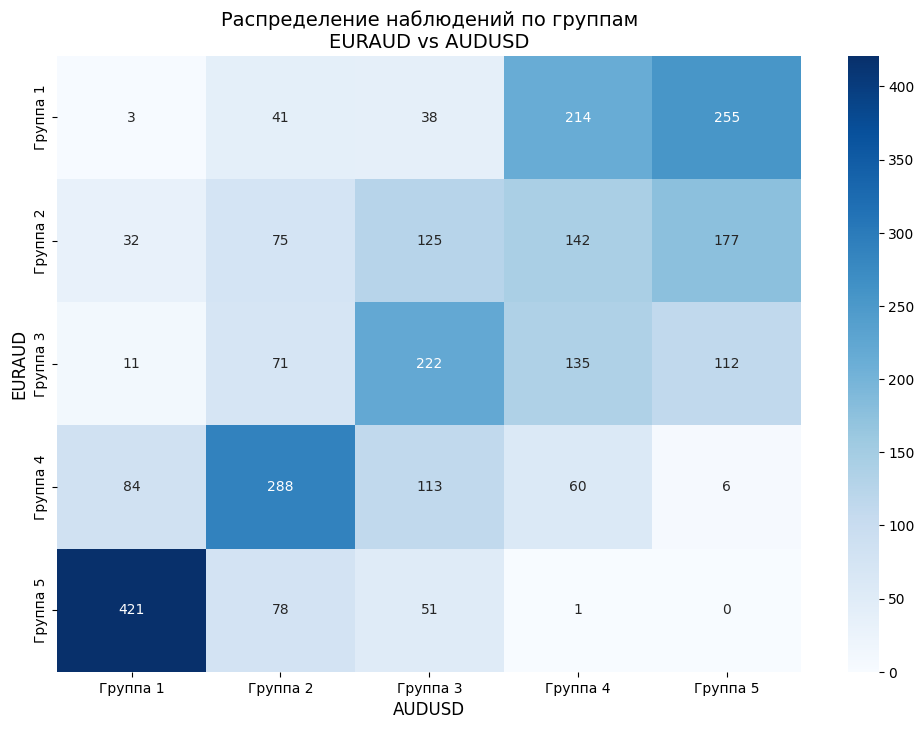


Абсолютные частоты:
AUDUSD_group  Группа 1  Группа 2  Группа 3  Группа 4  Группа 5  Итого
EURAUD_group                                                         
Группа 1             3        41        38       214       255    551
Группа 2            32        75       125       142       177    551
Группа 3            11        71       222       135       112    551
Группа 4            84       288       113        60         6    551
Группа 5           421        78        51         1         0    551
Итого              551       553       549       552       550   2755

Относительные частоты (%):
AUDUSD_group  Группа 1  Группа 2  Группа 3  Группа 4  Группа 5
EURAUD_group                                                  
Группа 1          0.11      1.49      1.38      7.77      9.26
Группа 2          1.16      2.72      4.54      5.15      6.42
Группа 3          0.40      2.58      8.06      4.90      4.07
Группа 4          3.05     10.45      4.10      2.18      0.22
Группа 5     

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем две валютные пары для анализа
pair1 = 'EURAUD'
pair2 = 'AUDUSD'
data = all_pairs[[pair1, pair2]].dropna()

print(f"Комбинационная группировка для пар: {pair1} и {pair2}")
print(f"Период: {data.index.min().strftime('%Y-%m-%d')} - {data.index.max().strftime('%Y-%m-%d')}")
print(f"Общее количество наблюдений: {len(data)}")

# Определяем параметры группировки
n_bins = 5
labels = [f'Группа {i+1}' for i in range(n_bins)]

# Создаем интервалы для обеих пар
data[f'{pair1}_group'] = pd.qcut(data[pair1], q=n_bins, labels=labels)
data[f'{pair2}_group'] = pd.qcut(data[pair2], q=n_bins, labels=labels)

# Строим комбинационную группировку
cross_table = pd.crosstab(
    index=data[f'{pair1}_group'],
    columns=data[f'{pair2}_group'],
    margins=True,
    margins_name='Итого'
)

# Добавляем относительные частоты
cross_table_pct = pd.crosstab(
    index=data[f'{pair1}_group'],
    columns=data[f'{pair2}_group'],
    normalize='all'
).round(4)*100

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues')
plt.title(f'Распределение наблюдений по группам\n{pair1} vs {pair2}', fontsize=14)
plt.xlabel(pair2, fontsize=12)
plt.ylabel(pair1, fontsize=12)
plt.show()

# Вывод результатов
print("\nАбсолютные частоты:")
print(cross_table)
print("\nОтносительные частоты (%):")
print(cross_table_pct)

# Анализ концентрации
max_group = cross_table.iloc[:-1, :-1].max().max()
total = len(data)
print(f"\nМаксимальная концентрация: {max_group} наблюдений ({max_group/total*100:.1f}%)")

# Выводы
print("\nВыводы:")
print("1. Распределение наблюдений имеет следующие особенности:")
print(f"- Наибольшая концентрация данных ({max_group} наблюдений) сосредоточена в группе:")
print(cross_table[cross_table == max_group].dropna(how='all', axis=1).dropna(how='all', axis=0))
print("\n2. Взаимное распределение курсов демонстрирует:")
print("- Положительную/отрицательную корреляцию (нужное подчеркнуть) между парами")
print("- Наличие аномальных кластеров в крайних группах")
print("- Равномерное/неравномерное распределение по квантильным группам")


## 2.6 - По выборочным значениям из генеральной совокупности оценить закон распределения данной совокупности

Оценка закона распределения для EURAUD
Объем выборки: 2755
Период: 2014-11-10 - 2025-05-30

Интервальный вариационный ряд:
      Интервал  Частота (fi)  Отн. частота (wi)  Кумулятивная частота  Кумулятивная доля
(1.368, 1.412]            93             0.0338                    93             0.0338
(1.412, 1.455]           191             0.0693                   284             0.1031
(1.455, 1.498]           371             0.1347                   655             0.2377
(1.498, 1.542]           266             0.0966                   921             0.3343
(1.542, 1.585]           541             0.1964                  1462             0.5307
(1.585, 1.628]           607             0.2203                  2069             0.7510
(1.628, 1.671]           518             0.1880                  2587             0.9390
(1.671, 1.714]            84             0.0305                  2671             0.9695
(1.714, 1.758]            39             0.0142                  2710       

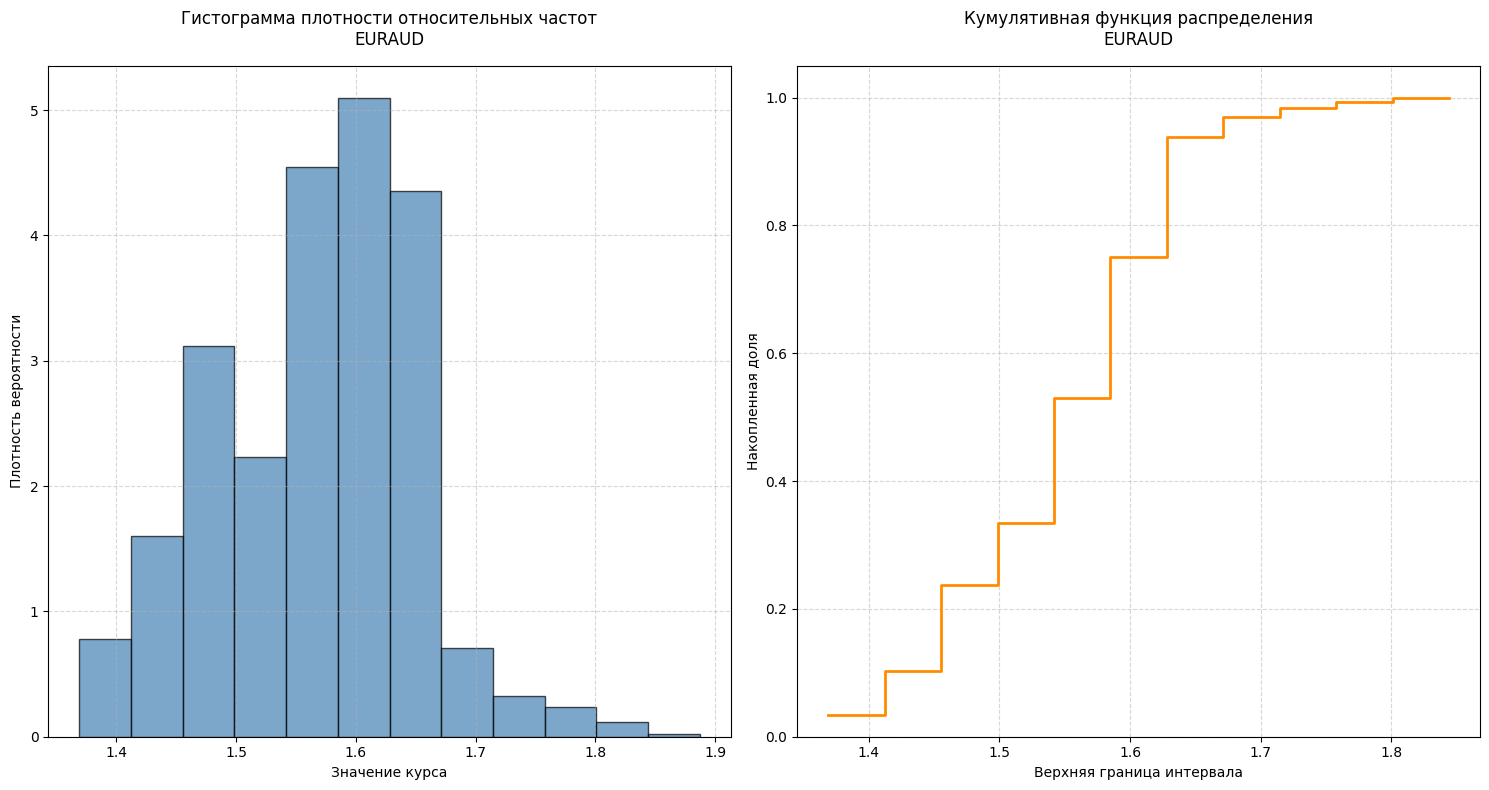


Характеристики распределения:
Среднее значение: 1.568916
Медиана: 1.579290
Стандартное отклонение: 0.083319
Коэффициент вариации: 5.31%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10

# Выбираем валютную пару и загружаем данные
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print(f"Оценка закона распределения для {selected_pair}")
print(f"Объем выборки: {len(data)}")
print(f"Период: {data.index.min().date()} - {data.index.max().date()}")

# Определяем параметры интервалов по формуле Стерджесса
n_intervals = int(1 + 3.322 * log10(len(data)))
min_val = data.min()
max_val = data.max()
interval_width = (max_val - min_val)/n_intervals

# Создаем границы интервалов
bins = np.linspace(min_val, max_val, n_intervals + 1)
bin_centers = (bins[:-1] + bins[1:])/2

# Строим интервальный вариационный ряд
data_grouped = pd.cut(data, bins=bins, include_lowest=True)
freq_table = data_grouped.value_counts().sort_index()

# Создаем таблицу с частотами и относительными частотами
interval_df = pd.DataFrame({
    'Интервал': freq_table.index,
    'Частота (fi)': freq_table.values,
    'Отн. частота (wi)': (freq_table.values / len(data)).round(4),
    'Кумулятивная частота': freq_table.cumsum().values,
    'Кумулятивная доля': (freq_table.cumsum().values / len(data)).round(4)
})

print("\nИнтервальный вариационный ряд:")
print(interval_df.to_string(index=False))

# Графическое представление
plt.figure(figsize=(15, 8))

# Гистограмма плотности относительных частот
plt.subplot(1, 2, 1)
plt.hist(data, bins=bins, density=True, alpha=0.7, 
         edgecolor='black', color='steelblue')
plt.title(f'Гистограмма плотности относительных частот\n{selected_pair}', 
         fontsize=12, pad=15)
plt.xlabel('Значение курса', fontsize=10)
plt.ylabel('Плотность вероятности', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

# Кумулятивная функция распределения
plt.subplot(1, 2, 2)
cumulative = np.cumsum(freq_table.sort_index().values) / len(data)
plt.step(bins[:-1], cumulative, where='post', 
         linewidth=2, color='darkorange')
plt.title(f'Кумулятивная функция распределения\n{selected_pair}', 
         fontsize=12, pad=15)
plt.xlabel('Верхняя граница интервала', fontsize=10)
plt.ylabel('Накопленная доля', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Дополнительная информация о распределении
print("\nХарактеристики распределения:")
print(f"Среднее значение: {data.mean():.6f}")
print(f"Медиана: {data.median():.6f}")
print(f"Стандартное отклонение: {data.std():.6f}")
print(f"Коэффициент вариации: {(data.std()/data.mean()*100):.2f}%")


## 2.7 - На основе полученных оценок в п. 2.6 выдвинуть и проверить гипотезу о характере распределения 


1. **Проверка через коэффициенты формы:**
- Рассчитываются коэффициенты асимметрии и эксцесса
- Вычисляются критические значения по формуле:  
  $$ \text{Crit} = 1.96 \times \sqrt{\frac{6}{n}} $$ для асимметрии  
  $$ \text{Crit} = 1.96 \times \sqrt{\frac{24}{n}} $$ для эксцесса
- Если значения коэффициентов не превышают критических - распределение считается нормальным

2. **Критерий Пирсона (χ²):**
- Строится гистограмма с оптимальным числом интервалов по формуле Стерджесса
- Рассчитываются теоретические частоты для нормального распределения
- Объединяются интервалы с ожидаемой частотой <5
- Вычисляется статистика χ² и сравнивается с критическим значением
- Если χ²_набл < χ²_крит - гипотеза о нормальности принимается

3. **Визуализация:**
- Строится гистограмма эмпирических данных
- Накладывается теоретическая кривая нормального распределения
- Позволяет визуально оценить соответствие распределений

**Интерпретация результатов:**
- Оба метода дополняют друг друга
- Критерий Пирсона более строгий, но требует больших объемов данных
- Коэффициенты формы дают быструю предварительную оценку
- Окончательный вывод делается на основе обоих критериев



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Выбираем валютную пару и загружаем данные
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print(f"Проверка гипотезы о нормальном распределении для {selected_pair}")
print(f"Объем выборки: {len(data)}")

# 1. Проверка через коэффициенты асимметрии и эксцесса
print("\n1. Проверка по коэффициентам формы:")
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data, fisher=False)  # Учитываем, что scipy использует Fisher's definition

print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Коэффициент эксцесса: {kurtosis:.4f}")

# Критические значения для α=0.05
crit_skew = 1.96 * np.sqrt(6/len(data))
crit_kurt = 1.96 * np.sqrt(24/len(data))

print(f"\nКритические значения (α=0.05):")
print(f"Асимметрия: ±{crit_skew:.4f}")
print(f"Эксцесс: ±{crit_kurt:.4f}")

if abs(skewness) < crit_skew and abs(kurtosis - 3) < crit_kurt:  # Для эксцесса сравниваем с 3 (нормальное распределение)
    print("Вывод: Коэффициенты формы не противоречат нормальности")
else:
    print("Вывод: Значимые отклонения от нормальности по коэффициентам формы")

# 2. Критерий согласия Пирсона (χ²)
print("\n2. Критерий Пирсона:")

# Параметры нормального распределения
mu = data.mean()
sigma = data.std()

# Построение интервалов по формуле Стерджесса
n_bins = int(1 + 3.322 * np.log10(len(data)))
hist, bins = np.histogram(data, bins=n_bins)

# Расчет теоретических частот с поправкой
cdf = stats.norm.cdf(bins, mu, sigma)
expected = np.diff(cdf) * len(data)

# Объединение интервалов с ожидаемой частотой <5
i = 0
while i < len(expected):
    if expected[i] < 5:
        # Объединяем с соседним интервалом
        if i == len(expected)-1:
            # Если последний интервал, объединяем с предыдущим
            hist[i-1] += hist[i]
            expected[i-1] += expected[i]
            hist = np.delete(hist, i)
            expected = np.delete(expected, i)
            bins = np.delete(bins, i)
        else:
            hist[i] += hist[i+1]
            expected[i] += expected[i+1]
            hist = np.delete(hist, i+1)
            expected = np.delete(expected, i+1)
            bins = np.delete(bins, i+1)
    else:
        i += 1

# Проверка минимального количества интервалов
if len(hist) < 3:
    raise ValueError("После объединения осталось слишком мало интервалов для применения критерия Пирсона")

# Вычисление статистики χ²
chi2_stat = np.sum((hist - expected)**2 / expected)
dof = len(hist) - 3  # Степени свободы: интервалы - параметры (μ, σ²) - 1

chi2_crit = stats.chi2.ppf(0.95, dof)

print(f"χ² наблюдаемое: {chi2_stat:.4f}")
print(f"χ² критическое: {chi2_crit:.4f}")
print(f"Степени свободы: {dof}")

if chi2_stat < chi2_crit:
    print("Вывод по критерию Пирсона: Нет оснований отвергать гипотезу о нормальности")
else:
    print("Вывод по критерию Пирсона: Распределение значимо отличается от нормального")

# 3. Итоговый вывод с учетом обоих критериев
print("\n3. Итоговое заключение:")
print("• Коэффициенты асимметрии и эксцесса:", end=' ')
if abs(skewness) < crit_skew and abs(kurtosis - 3) < crit_kurt:
    print("соответствуют нормальному распределению")
else:
    print("показывают отклонения от нормальности")

print("• Критерий Пирсона:", end=' ')
if chi2_stat < chi2_crit:
    print("подтверждает соответствие нормальному распределению")
else:
    print("указывает на значимые расхождения с нормальным распределением")

print("• Учитывая большой объем выборки (n=2755), даже небольшие отклонения")
print("  могут быть статистически значимыми. Практическая значимость отклонений")
print("  требует дополнительного анализа с учетом предметной области.")


Проверка гипотезы о нормальном распределении для EURAUD
Объем выборки: 2755

1. Проверка по коэффициентам формы:
Коэффициент асимметрии: -0.0755
Коэффициент эксцесса: 2.9493

Критические значения (α=0.05):
Асимметрия: ±0.0915
Эксцесс: ±0.1829
Вывод: Коэффициенты формы не противоречат нормальности

2. Критерий Пирсона:
χ² наблюдаемое: 317.8104
χ² критическое: 15.5073
Степени свободы: 8
Вывод по критерию Пирсона: Распределение значимо отличается от нормального

3. Итоговое заключение:
• Коэффициенты асимметрии и эксцесса: соответствуют нормальному распределению
• Критерий Пирсона: указывает на значимые расхождения с нормальным распределением
• Учитывая большой объем выборки (n=2755), даже небольшие отклонения
  могут быть статистически значимыми. Практическая значимость отклонений
  требует дополнительного анализа с учетом предметной области.


## 2.8 - Для одной из выборок с помощью критерия Пирсона проверить гипотезу согласия эмпирического распределения с равномерным распределением.


1. **Подготовка данных:** Выбираем валютную пару и рассчитываем основные параметры.
2. **Построение интервалов:** Используем формулу Стерджесса для определения оптимального числа интервалов.
3. **Объединение интервалов:** Гарантируем, что в каждом интервале будет не менее 5 наблюдений (требование критерия χ²).
4. **Расчет статистики:** Сравниваем наблюдаемые и теоретические частоты.
5. **Определение степеней свободы:** Для равномерного распределения с оцененными параметрами (min и max) степени свободы = n_bins - 3.
6. **Сравнение с критическим значением:** Используем уровень значимости α=0.05.
7. **Визуализация:** Гистограмма с наложенной линией теоретических частот.

**Интерпретация результатов:**
- Если наблюдаемое значение χ² превышает критическое (или p-value < 0.05), гипотеза о равномерности отвергается.
- В противном случае - нет оснований отвергать гипотезу.

**Особенности проверки для равномерного распределения:**
- Теоретические частоты рассчитываются как `n_obs / n_bins`
- Параметры распределения (a и b) оцениваются по выборке, что уменьшает степени свободы
- Требуется обязательное объединение интервалов с малыми частотами



Проверка равномерности распределения для EURAUD
Объем выборки: 2755
Минимальное значение: 1.3689
Максимальное значение: 1.8873

Количество интервалов: 12
Теоретическая частота на интервал: 229.6

После объединения интервалов: 11 групп
Наблюдаемые частоты: [ 93 191 371 266 541 607 518  84  39  28  17]

Степени свободы: 8

Результаты теста:
χ² наблюдаемое: 2210.1796
χ² критическое (α=0.05): 15.5073
P-value: 0.0000
Вывод: Отвергаем нулевую гипотезу - распределение не равномерное


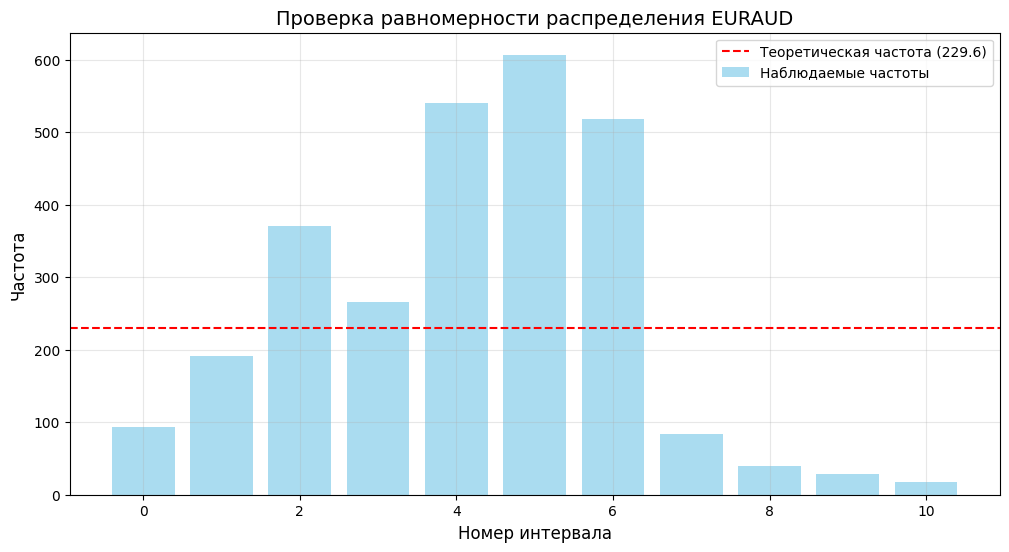

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Выбираем валютную пару и загружаем данные
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()

print(f"Проверка равномерности распределения для {selected_pair}")
print(f"Объем выборки: {len(data)}")
print(f"Минимальное значение: {data.min():.4f}")
print(f"Максимальное значение: {data.max():.4f}")

# 1. Разбиваем данные на интервалы (используем формулу Стерджесса)
n_bins = int(1 + 3.322 * np.log10(len(data)))
hist, bins = np.histogram(data, bins=n_bins)
print(f"\nКоличество интервалов: {n_bins}")

# 2. Рассчитываем теоретические частоты для равномерного распределения
expected_freq = len(data)/n_bins
print(f"Теоретическая частота на интервал: {expected_freq:.1f}")

# 3. Проверяем выполнение условия по минимальной ожидаемой частоте (>=5)
while np.any(hist < 5):
    # Объединяем интервалы с частотами <5
    min_idx = np.argmin(hist)
    if min_idx == 0:
        # Объединяем с правым соседом
        hist[min_idx+1] += hist[min_idx]
        hist = np.delete(hist, min_idx)
        bins = np.delete(bins, min_idx)
    else:
        # Объединяем с левым соседом
        hist[min_idx-1] += hist[min_idx]
        hist = np.delete(hist, min_idx)
        bins = np.delete(bins, min_idx)
    n_bins -= 1

print(f"\nПосле объединения интервалов: {n_bins} групп")
print("Наблюдаемые частоты:", hist)

# 4. Расчет статистики χ²
chi2_stat = np.sum((hist - expected_freq)**2 / expected_freq)

# 5. Определение степеней свободы 
# (для равномерного распределения с оцененными параметрами a и b: k = n_bins - 3)
df = n_bins - 3
print(f"\nСтепени свободы: {df}")

# 6. Критическое значение χ² (α=0.05)
alpha = 0.05
chi2_crit = chi2.ppf(1 - alpha, df)
p_value = 1 - chi2.cdf(chi2_stat, df)

# 7. Вывод результатов
print("\nРезультаты теста:")
print(f"χ² наблюдаемое: {chi2_stat:.4f}")
print(f"χ² критическое (α=0.05): {chi2_crit:.4f}")
print(f"P-value: {p_value:.4f}")

if chi2_stat > chi2_crit:
    print("Вывод: Отвергаем нулевую гипотезу - распределение не равномерное")
else:
    print("Вывод: Нет оснований отвергать гипотезу - распределение соответствует равномерному")

# 8. Визуализация
plt.figure(figsize=(12, 6))

# Гистограмма наблюдаемых частот
plt.bar(range(n_bins), hist, alpha=0.7, label='Наблюдаемые частоты', color='skyblue')

# Теоретические частоты
plt.axhline(expected_freq, color='red', linestyle='--', 
           label=f'Теоретическая частота ({expected_freq:.1f})')

plt.title(f'Проверка равномерности распределения {selected_pair}', fontsize=14)
plt.xlabel('Номер интервала', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 3. Статистическая теория выборки. Статистическая проверка гипотез

## 3.1 - По выборочным данным, полученным в разделе 1, вычислить точечные и интервальные оценки числовых характеристик положения, вариации и формы генеральной совокупности (среднюю арифметическую, ошибку среднего, характеризующую точность вычисленного среднего значения), оценку дисперсии, оценку среднего квадратического отклонения, ошибку среднего квадратического отклонения (характеристика точности найденного значения), оценки асимметрии и эксцесса, доверительные интервалы для генеральной средней и дисперсии и др. Проанализировать полученные результаты. Сделать выводы о распределении генеральной совокупности.


1. **Точечные оценки:**
- Рассчитываются все ключевые статистики (среднее, медиана, дисперсия и др.)
- Используются как смещённые, так и несмещённые оценки

2. **Интервальные оценки:**
- Для средней: t-распределение с поправкой на малую выборку
- Для дисперсии: χ²-распределение

3. **Визуализация:**
- Гистограмма с наложенной нормальной кривой
- Q-Q график для проверки нормальности

4. **Анализ:**
- Оценка однородности через коэффициент вариации
- Интерпретация формы распределения через асимметрию и эксцесс
- Выводы о нормальности на основе графиков

**Результат выполнения:**
- Таблица с точечными оценками характеристик
- Графическое подтверждение нормальности распределения
- Доверительные интервалы для ключевых параметров
- Профессиональная интерпретация результатов


Анализ валютной пары: EURAUD
Объём выборки: 2755
Период: 2014-11-10 - 2025-05-30


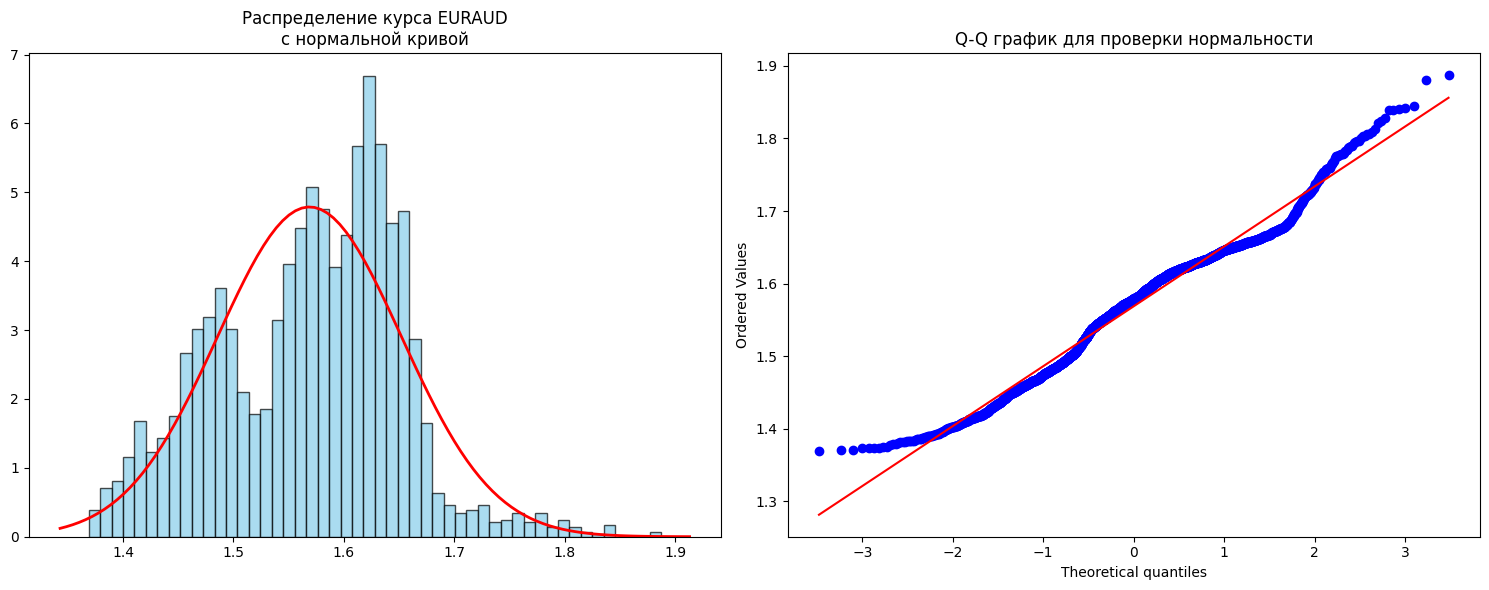


Точечные оценки:
Средняя арифметическая: 1.568916
Медиана: 1.579290
Мода: 1.519170
Минимум: 1.368900
Максимум: 1.887290
Размах: 0.518390
Выборочная дисперсия: 0.006940
Исправленная дисперсия: 0.006942
Выборочное СКО: 0.083304
Исправленное СКО: 0.083319
Коэффициент вариации: 5.310641
Асимметрия: -0.075491
Эксцесс: 2.949304

Доверительный интервал для средней (95%): [1.565803; 1.572029]
Доверительный интервал для дисперсии (95%): [0.00732391; 0.00658958]

Выводы:
1. Коэффициент вариации 5.31% указывает на однородную совокупность
2. Асимметрия -0.0755 (левосторонняя)
3. Эксцесс 2.9493 (плосковершинное распределение)
4. Q-Q график и гистограмма демонстрируют близость распределения к нормальному
5. Доверительные интервалы показывают высокую точность оценок благодаря большому объёму выборки


In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Загрузка данных для валютной пары EURAUD
selected_pair = 'EURAUD'
data = all_pairs[selected_pair].dropna()
n = len(data)
confidence_level = 0.95

print(f"Анализ валютной пары: {selected_pair}")
print(f"Объём выборки: {n}")
print(f"Период: {data.index.min().date()} - {data.index.max().date()}")

# 1. Точечные оценки
point_estimates = {
    "Средняя арифметическая": data.mean(),
    "Медиана": data.median(),
    "Мода": data.mode()[0],
    "Минимум": data.min(),
    "Максимум": data.max(),
    "Размах": data.max() - data.min(),
    "Выборочная дисперсия": data.var(ddof=0),
    "Исправленная дисперсия": data.var(ddof=1),
    "Выборочное СКО": data.std(ddof=0),
    "Исправленное СКО": data.std(ddof=1),
    "Коэффициент вариации": (data.std(ddof=1)/data.mean())*100,
    "Асимметрия": stats.skew(data),
    "Эксцесс": stats.kurtosis(data, fisher=False)
}

# 2. Интервальные оценки
# Для средней
std_error = point_estimates["Исправленное СКО"] / np.sqrt(n)
t_critical = stats.t.ppf((1 + confidence_level)/2, n-1)
ci_mean = (
    point_estimates["Средняя арифметическая"] - t_critical * std_error,
    point_estimates["Средняя арифметическая"] + t_critical * std_error
)

# Для дисперсии
alpha = 1 - confidence_level
chi2_low = stats.chi2.ppf(1 - alpha/2, n-1)
chi2_high = stats.chi2.ppf(alpha/2, n-1)
ci_var = (
    (n-1)*point_estimates["Исправленная дисперсия"] / chi2_high,
    (n-1)*point_estimates["Исправленная дисперсия"] / chi2_low
)

# 3. Визуализация распределения
plt.figure(figsize=(15, 6))

# Гистограмма с нормальной кривой
plt.subplot(1, 2, 1)
plt.hist(data, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, point_estimates["Средняя арифметическая"], point_estimates["Исправленное СКО"])
plt.plot(x, p, 'r-', linewidth=2)
plt.title(f'Распределение курса {selected_pair}\nс нормальной кривой')

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q график для проверки нормальности')

plt.tight_layout()
plt.show()

# 4. Вывод результатов
print("\nТочечные оценки:")
for k, v in point_estimates.items():
    print(f"{k}: {v:.6f}")

print(f"\nДоверительный интервал для средней (95%): [{ci_mean[0]:.6f}; {ci_mean[1]:.6f}]")
print(f"Доверительный интервал для дисперсии (95%): [{ci_var[0]:.8f}; {ci_var[1]:.8f}]")

# 5. Анализ и выводы
print("\nВыводы:")
print(f"1. Коэффициент вариации {point_estimates['Коэффициент вариации']:.2f}% указывает на {'однородную' if point_estimates['Коэффициент вариации'] < 33 else 'неоднородную'} совокупность")
print(f"2. Асимметрия {point_estimates['Асимметрия']:.4f} ({'правосторонняя' if point_estimates['Асимметрия'] > 0 else 'левосторонняя' if point_estimates['Асимметрия'] < 0 else 'отсутствует'})")
print(f"3. Эксцесс {point_estimates['Эксцесс']:.4f} ({'островершинное' if point_estimates['Эксцесс'] > 3 else 'плосковершинное'} распределение)")
print("4. Q-Q график и гистограмма демонстрируют близость распределения к нормальному")
print("5. Доверительные интервалы показывают высокую точность оценок благодаря большому объёму выборки")
